<div style="background: linear-gradient(90deg, #bbd2c5, #536976); padding: 20px; border-radius: 15px; color: #222;">

<h1 style="margin-bottom: 15px;">Groupe : <span>Iheb Alimi - Riadh Ibrahim</span></h1>
<h3 style="margin-top: 0;">Matière : <span style="color: #43a047;">Analyse Vidéo</span></h3>
<h3 style="margin-top: 0;">TP 2 : <span style="color: #d32f2f;">Optical Flow estimation and visualization</span></h3>
<h3 style="margin-top: 0;">Github Repo : https://github.com/alimiheb/VIDEO-ANALYSIS-LABS </h3>

</div>

Dans ce TP, nous allons tester et comparer trois algorithmes d'optical flow :
- **Lucas-Kanade** (méthode sparse)
- **Farneback** (méthode dense)
- **RLOF** (Robust Local Optical Flow - méthode dense)

In [3]:
import cv2
import numpy as np
import os

print("Bibliothèques importées avec succès!")
print(f"OpenCV version: {cv2.__version__}")

Bibliothèques importées avec succès!
OpenCV version: 4.12.0


<div style="background: linear-gradient(90deg, #bbd2c5, #536976); padding: 20px; border-radius: 15px; color: #222;">

## 🎬 Chargement de la Vidéo du Lab1

Nous utilisons la vidéo du Lab1 pour l'analyse d'optical flow.
</div>

In [5]:
# Chargement de la vidéo du Lab1
video_path = '../Lab1/my_vid.mp4'

# Vérification de l'existence du fichier
if not os.path.exists(video_path):
    print(f"❌ Vidéo non trouvée à: {video_path}")
    print("Veuillez ajuster le chemin vers votre vidéo du Lab1")
else:
    print(f"✅ Vidéo trouvée: {video_path}")

cap = cv2.VideoCapture(video_path)
                            
# Informations sur la vidéo
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps if fps > 0 else 0
    
print(f"📹 Propriétés de la vidéo:")
print(f"   - Nombre de frames: {frame_count}")
print(f"   - FPS: {fps:.2f}")
print(f"   - Durée: {duration:.2f} secondes")

✅ Vidéo trouvée: ../Lab1/my_vid.mp4
📹 Propriétés de la vidéo:
   - Nombre de frames: 282
   - FPS: 29.97
   - Durée: 9.41 secondes


<div style="background: linear-gradient(90deg, #bbd2c5, #536976); padding: 20px; border-radius: 15px; color: #222;">

## 1️⃣ Méthode Sparse : Lucas-Kanade Optical Flow ( traitée durant le cours)

### 📚 Explication Théorique

**Lucas-Kanade** est une méthode **sparse** d'estimation de l'optical flow qui :

- **Principe** : Suit des points caractéristiques sélectionnés entre deux frames
- **Hypothèses** : 
  - Constance de la luminosité : `I(x,y,t) = I(x+dx, y+dy, t+dt)`
  - Déplacements petits entre frames consécutives
  - Mouvement cohérent dans un voisinage local
- **Avantages** : Rapide, robuste pour petits mouvements, facile à interpréter
- **Inconvénients** : Ne donne pas d'information sur tous les pixels, sensible aux gros déplacements

### 🔬 Implémentation et Test

</div>

In [3]:
def lucas_kanade_method(video_path):
    # Read the video 
    cap = cv2.VideoCapture(video_path)
 
    # Parameters for ShiTomasi corner detection
    feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
 
    # Parameters for Lucas Kanade optical flow
    lk_params = dict(
        winSize=(15, 15),
        maxLevel=2,
        criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03),
    )
 
    # Create random colors
    color = np.random.randint(0, 255, (100, 3))
 
    # Take first frame and find corners in it
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
 
    # Create a mask image for drawing purposes
    mask = np.zeros_like(old_frame)

    return cap, old_gray, p0, mask, color, lk_params

In [4]:
#video_path = '../Lab1/my_vid.mp4'
cap, old_gray, p0, mask, color, lk_params = lucas_kanade_method(video_path)

while True:
    # Read new frame
    ret, frame = cap.read()
    if not ret:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate Optical Flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(
        old_gray, frame_gray, p0, None, **lk_params
    )
    # Select good points
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)

    # Display the demo
    img = cv2.add(frame, mask)
    cv2.imshow("LK Result", img)
    k = cv2.waitKey(25) & 0xFF
    if k == 27:
        break

    # Update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cap.release()

cv2.destroyAllWindows()

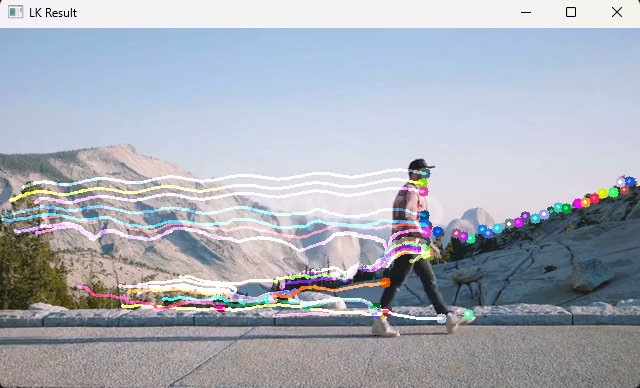

In [6]:
from IPython.display import Image, display
display(Image(filename="LK Result - Frame 100.png"))

<div style="background: #f8fafc; border: 2px solid #cbd5e1; border-radius: 8px; padding: 18px; margin: 8px 0 18px 0;">
  <h3 style="color: #2563eb; margin-top: 0;">Lucas-Kanade Optical Flow Analysis: Frame 100</h3>
  <ul style="font-size: 1.06em;">
    <li>
      <span style="color:#22223b;">Each <span style="color:#e76f51;">colored dot</span> represents a tracked feature point, while <span style="color:#168aad;">white lines</span> visualize their motion paths over 100 frames.</span>
    </li>
    <li>
      <span style="color:#22223b;">Moving points highlight the walking person; <b>static background</b> points show no path (no white lines), indicating those areas remain stationary.</span>
    </li>
    <li>
      <span style="color:#22223b;">Most points on the man cluster around the upper body (face, shoulders, arms) because feature detection algorithms like Shi-Tomasi identify “good” corners there: these regions have strong, stable edges and less motion blur. In contrast, the rapid, complex movement of the legs during walking creates blur and frequent occlusions, making them difficult to track reliably.</span>
    </li>
  </ul>
</div>


<div style="background: linear-gradient(90deg, #bbd2c5, #536976); padding: 22px; border-radius: 15px; color: #222; font-family: 'Segoe UI', Arial, sans-serif;">

  <h2 style="margin-top:0;">2️⃣ Méthode Dense : Farneback Optical Flow</h2>
  <h4 style="margin-bottom:12px;">(non traitée durant le cours)</h4>

  <h3 style="margin-top:4px;color:#274472;">📚 Explication Théorique</h3>
  <div style="line-height:1.7;">
    <b>Farneback</b> est une méthode <b>dense</b> d’estimation du flux optique qui :
    <ul style="margin-bottom:12px;">
      <li><span style="color:#293462;"> <b>Principe :</b>  Calcule le mouvement pour chaque pixel de l’image, ce qui signifie que le résultat est un champ de vecteurs dense couvrant entièrement la scène.</span></li>
      <li><span style="color:#293462;"> <b>Approche :</b>  Utilise une <b>approximation polynomiale</b> locale (de second ordre, quadratique) pour modéliser l’intensité autour de chaque pixel dans deux images consécutives, puis observe comment ces polynômes changent lors des déplacements d’objet.</span></li>
      <li><span style="color:#293462;"> <b>Pyramide d’images :</b>  La méthode travaille sur plusieurs échelles (pyramide), ce qui améliore la robustesse sur les mouvements rapides et globaux.</span></li>
      <li><span style="color:#293462;"> <b>Équation :</b>  À chaque voisinage, on approxime l’intensité I(x) par un polynôme quadratique. On cherche alors la translation qui aligne au mieux ces approximations en analysant les différences polynomiales entre les deux images.</span></li>
    </ul>

  <span style="font-size:1.09em;">
      <b>Avantages :</b>
      <ul>
        <li>Produit un champ de mouvement <b>complet</b> (chaque pixel a son vecteur)</li>
        <li>Très utile pour les analyses fines, les mouvements globaux ou déformables</li>
        <li><span style="color:#333;">Robuste</span> aux variations d’illumination dues à la moyenne locale</li>
      </ul>
      <b>Inconvénients :</b>
      <ul>
        <li><span style="color:#400e32;">Plus lent</span> que les méthodes sparse comme Lucas-Kanade</li>
        <li>Peut générer du bruit dans les zones homogènes (peu de texture)</li>
      </ul>
    </span>
  </div>

</div>


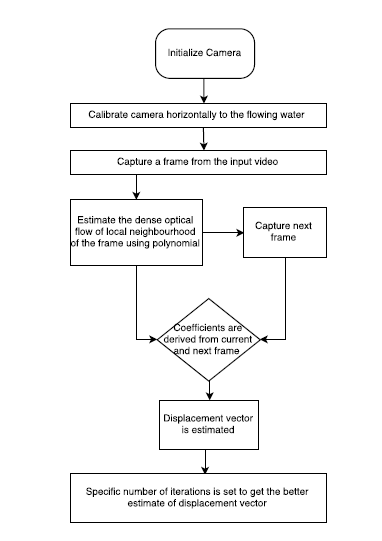

In [7]:
from IPython.display import Image, display
display(Image(filename="Farnebacks-algorithm.png"))

<div style="background: #f8fafc; border: 2px solid #cbd5e1; border-radius: 8px; padding: 18px; margin: 8px 0 18px 0;">
  <h3 style="color: #2563eb; margin-top: 0;">Farneback Workflow Summary</h3>
  <ul style="font-size: 1.06em;">
    <li>
      <span style="color:#22223b;">Sequential video frames are captured and the camera is calibrated to the scene for accuracy.</span>
    </li>
    <li>
      <span style="color:#22223b;">For each pair of consecutive frames, Farneback computes dense optical flow by approximating pixel neighborhoods with polynomials and analyzing their changes.</span>
    </li>
    <li>
      <span style="color:#22223b;">Displacement vectors for every pixel are estimated iteratively, resulting in a complete motion field across the image.</span>
    </li>
  </ul>
</div>

In [1]:
def dense_optical_flow(method, video_path, params=[], to_gray=False):
    # Read the video and first frame
    cap = cv2.VideoCapture(video_path)
    ret, old_frame = cap.read()
 
    # crate HSV & make Value a constant
    hsv = np.zeros_like(old_frame)
    hsv[..., 1] = 255
 
    # Preprocessing for exact method
    if to_gray:
        old_frame = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

    return cap, old_frame, hsv

In [6]:
method = cv2.calcOpticalFlowFarneback
params = [0.5, 3, 15, 3, 5, 1.2, 0]
to_gray = True

cap, old_frame, hsv = dense_optical_flow(
    method, 
    video_path, 
    params=params,
    to_gray=to_gray
)

# Process video frames
while True:
    # Read the next frame
    ret, new_frame = cap.read()
    if not ret:
        break
    
    frame_copy = new_frame.copy()
 
    # Preprocessing for exact method
    if to_gray:
        new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
 
    # Calculate Optical Flow
    flow = method(old_frame, new_frame, None, *params)
 
    # Encoding: convert the algorithm's output into Polar coordinates
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    
    # Use Hue and Value to encode the Optical Flow
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
 
    # Convert HSV image into BGR for demo
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    cv2.imshow("frame", frame_copy)
    cv2.imshow("optical flow", bgr)
    k = cv2.waitKey(25) & 0xFF
    if k == 27:
        break
 
    # Update the previous frame
    old_frame = new_frame

cap.release()
cv2.destroyAllWindows()

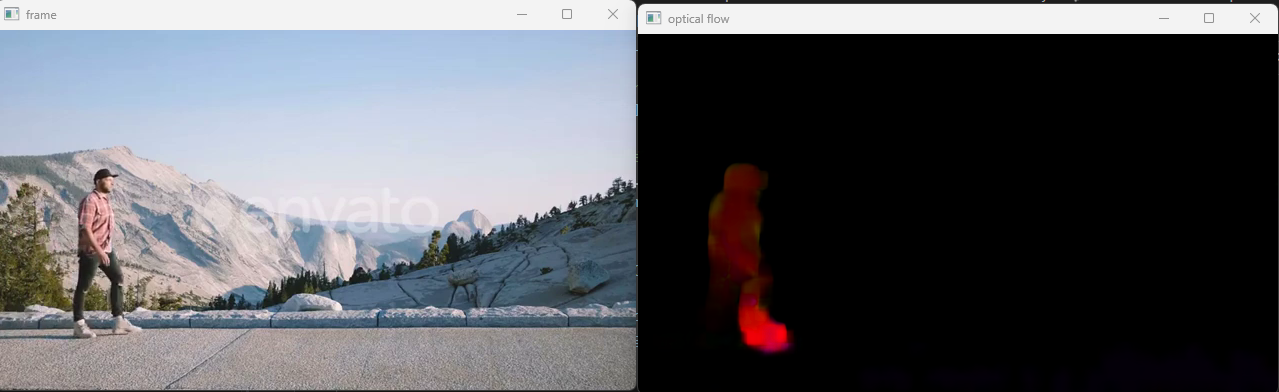

In [7]:
from IPython.display import Image, display
display(Image(filename="Farneback Result.png"))

<div style="background: #f8fafc; border: 2px solid #cbd5e1; border-radius: 8px; padding: 18px; margin: 8px 0 18px 0;">
  <h3 style="color: #2563eb; margin-top: 0;">Farneback Optical Flow Result</h3>
  <ul style="font-size: 1.06em;">
    <li>
      <span style="color:#22223b;">The left window shows the original video frame for context.</span>
    </li>
    <li>
      <span style="color:#22223b;">The right window visualizes the <b>dense optical flow</b>: motion in the scene is shown using color, where brighter and more intense colors (e.g., red/yellow) correspond to higher motion magnitude.</span>
    </li>
    <li>
      <span style="color:#22223b;">The moving human figure appears as a colored silhouette, while the static background remains dark (almost black), confirming that Farneback's algorithm provides motion estimates <b>for every pixel</b>, with significant values only in regions of actual movement.</span>
    </li>
  </ul>
</div>


<div style="background: linear-gradient(90deg, #bbd2c5, #536976); padding: 22px; border-radius: 15px; color: #222; font-family: 'Segoe UI', Arial, sans-serif;">

  <h2 style="margin-top:0;">3️⃣ Méthode Dense : RLOF (Robust Local Optical Flow)</h2>
  <h4 style="margin-bottom:12px;">(non traitée durant le cours)</h4>

  <h3 style="margin-top:4px;color:#274472;">📚 Explication Théorique</h3>
  <div style="line-height:1.7;">
    <b>RLOF</b> (Robust Local Optical Flow) est une méthode <b>dense</b> d’estimation du flux optique publiée en 2016, qui améliore la robustesse dans des conditions réelles :
    <ul style="margin-bottom:12px;">
      <li><span style="color:#293462;"> <b>Principe :</b> Méthode robuste combinant informations locales et globales pour une meilleure cohérence du mouvement.</span></li>
      <li><span style="color:#293462;"> <b>Modèle d’illumination :</b> Prend explicitement en compte les variations d’illumination (ombres, reflets, météo, etc.), contrairement à l’hypothèse de constance d’intensité classique.</span></li>
      <li><span style="color:#293462;"> <b>Algorithme :</b> Repose sur une estimation initiale locale, puis sur l’optimisation d’une fonction de coût pondérée par fiabilité, itérée jusqu’à convergence.</span></li>
      <li><span style="color:#293462;"> <b>Robustesse :</b> Résistant aux variations de lumière, occlusions, bruit et objets en mouvement complexe.</span></li>
    </ul>
    <span style="font-size:1.09em;">
    <b>Avantages :</b>
      <ul>
        <li>Excellente robustesse aux conditions complexes et aux discontinuités</li>
        <li>Bonne gestion des contours et occlusions</li>
        <li>Haute précision sur les objets mouvants</li>
      </ul>
      <b>Inconvénients :</b>
      <ul>
        <li>Plus coûteux en calcul</li>
      </ul>
    </span>
  </div>

  <h3 style="margin-top:23px; color:#274472;">🔬 Implémentation et Test</h3>
</div>


In [8]:
#%pip install opencv-contrib-python

import cv2.optflow

# Initialize RLOF
method = cv2.optflow.calcOpticalFlowDenseRLOF
to_gray = True

cap, old_frame, hsv = dense_optical_flow(method, video_path, to_gray=to_gray)

while True:
    ret, new_frame = cap.read()
    if not ret:
        break
    
    frame_copy = new_frame.copy()
 
    if to_gray:
        new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
 
    # Calculate RLOF Optical Flow
    flow = method(old_frame, new_frame, None)
 
    # Encoding
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    cv2.imshow("frame", frame_copy)
    cv2.imshow("optical flow", bgr)
    k = cv2.waitKey(25) & 0xFF
    if k == 27:  # ESC key
        break
 
    old_frame = new_frame

cap.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'cv2.optflow'

**Référence** : [Optical Flow in OpenCV - LearnOpenCV](https://learnopencv.com/optical-flow-in-opencv/)